### **Importing important libraries**

In [1]:
!pip install catboost

In [2]:
!pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, BaggingClassifier, VotingClassifier)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
!pip install opendatasets
import opendatasets as od

In [5]:
!pip install pandas

In [6]:
od.download("https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv")

Skipping, found downloaded files in "./email-spam-classification-dataset-csv" (use force=True to force download)


In [7]:
data_set = pd.read_csv('email-spam-classification-dataset-csv/emails.csv')

In [8]:
data_set.sample(8)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
4629,Email 4630,0,0,1,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
940,Email 941,0,8,2,0,0,1,114,0,1,...,0,0,0,0,0,0,0,1,0,1
2675,Email 2676,1,3,5,0,0,1,21,0,0,...,0,0,0,0,0,0,0,3,0,0
4736,Email 4737,11,16,6,6,11,5,112,7,2,...,0,0,0,0,0,0,0,3,0,1
2920,Email 2921,4,0,1,4,3,0,32,1,1,...,0,0,0,0,0,0,0,0,0,0
1975,Email 1976,0,0,1,0,1,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1585,Email 1586,1,7,1,0,1,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0
2919,Email 2920,3,0,1,2,2,0,20,1,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data_set.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


<ipython-input-10-5ad4fdde46de>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Prediction', data=data_set, palette=['#5cb85c', '#d9534f'])   # Create the countplot using Seaborn with color palette for distinction


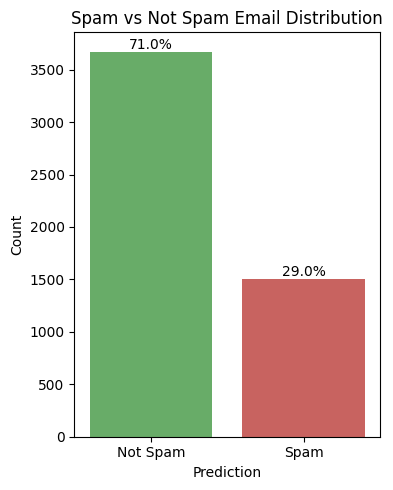

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
data_set = pd.read_csv('email-spam-classification-dataset-csv/emails.csv')
data_set.sample(8)
data_set.describe()
prediction_counts = data_set['Prediction'].value_counts()
plt.figure(figsize=(4, 5))                                                          # Set up the plot figure size
total = len(data_set['Prediction'])                                                 # Calculate the total number of data points
ax = sns.countplot(x='Prediction', data=data_set, palette=['#5cb85c', '#d9534f'])   # Create the countplot using Seaborn with color palette for distinction
for p in ax.patches:                                                                # Annotate bars with percentages
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.xticks([0, 1], ['Not Spam', 'Spam'])                                             # Customize x-axis labels
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Spam vs Not Spam Email Distribution')
plt.tight_layout()
plt.savefig('ditribution.png')
plt.show()
from google.colab import files
files.download('ditribution.png')


In [11]:
data_set.shape

(5172, 3002)

In [12]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


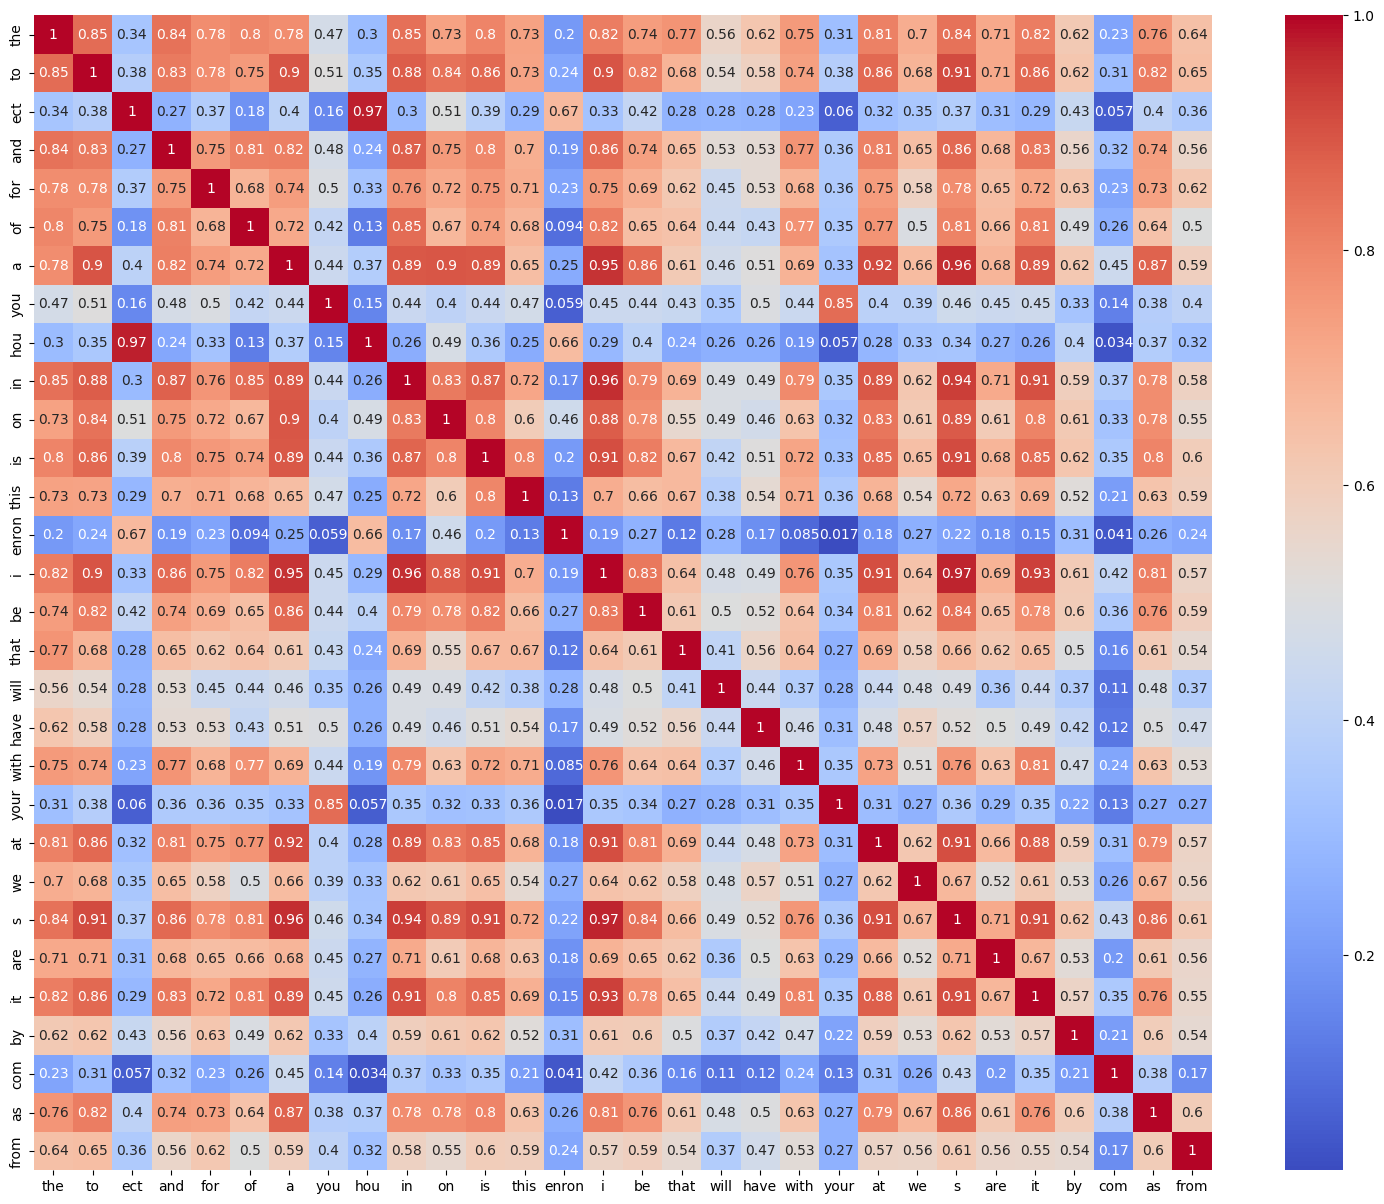

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
numeric_columns = data_set.select_dtypes(include='number').columns
selected_columns = numeric_columns[:30]
correlation_matrix = data_set[selected_columns].corr()
plt.figure(figsize=(19,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('correlation_heatmap.png')
plt.show()
from google.colab import files
files.download('correlation_heatmap.png')

### Data separating

In [14]:
start_col = 1
end_col = 3000

X = data_set.iloc[:, start_col:end_col+1]
Y = data_set.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    stratify=Y,
                                                    random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Selected Features: Columns {start_col} to {end_col}")
print(f"Training Set Shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test Set Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Selected Features: Columns 1 to 3000
Training Set Shape: X_train: (4137, 3000), y_train: (4137,)
Test Set Shape: X_test: (1035, 3000), y_test: (1035,)


In [15]:
print(X.iloc[:10,:10])

   the  to  ect  and  for  of    a  you  hou  in
0    0   0    1    0    0   0    2    0    0   0
1    8  13   24    6    6   2  102    1   27  18
2    0   0    1    0    0   0    8    0    0   4
3    0   5   22    0    5   1   51    2   10   1
4    7   6   17    1    5   2   57    0    9   3
5    4   5    1    4    2   3   45    1    0  16
6    5   3    1    3    2   1   37    0    0   9
7    0   2    2    3    1   2   21    6    0   2
8    2   2    3    0    0   1   18    0    0   3
9    4   4   35    0    1   0   49    1   16   9


In [16]:
print(Y[:10])

[0 0 0 0 0 1 0 1 0 0]


### Model testing

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier # Explicitly import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, PassiveAggressiveClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



# Helper function to calculate specificity
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Extend the evaluate_model function to return additional metrics
def evaluate_model(model_name, X_train, X_test, y_train, y_test):
    model_dict = {
        "GaussianNB": GaussianNB(),
        "SVC": SVC(),
        "LinearSVC": LinearSVC(),
        "RandomForest": RandomForestClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "GradientBoosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10), # Use 'estimator' instead of 'base_estimator'
        "Voting": VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svc', SVC())], voting='hard'),
        "LogisticRegression": LogisticRegression(),
        "XGBClassifier": XGBClassifier(),
        "LGBMClassifier": LGBMClassifier(),
        "CatBoostClassifier": CatBoostClassifier(verbose=0),
        "Perceptron": Perceptron(),
        "SGDClassifier": SGDClassifier(),
        "PassiveAggressive": PassiveAggressiveClassifier(),
    }

    if model_name not in model_dict:
        raise ValueError(f"Invalid model name '{model_name}'. Please select from the following: {list(model_dict.keys())}")

    model = model_dict[model_name]

    # Special case for Naive Bayes that requires scaling
    if model_name == "MultinomialNB":
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Sensitivity
    specificity = specificity_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # Print metrics
    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall (Sensitivity): {recall * 100:.2f}%")
    print(f"Specificity: {specificity * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")

    # Return metrics
    return {
        "Model Name": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Sensitivity": recall,
        "Specificity": specificity,
        "F1 Score": f1
    }

# Compare multiple models and plot results
def compare_models(models, X_train, X_test, y_train, y_test):
    results = []

    for model_name in models:
        metrics = evaluate_model(model_name, X_train, X_test, y_train, y_test)
        results.append(metrics)

    # Convert results into a dictionary of lists for easier plotting
    metrics_dict = {
        "Model": [],
        "Accuracy": [],
        "Precision": [],
        "Sensitivity": [],
        "Specificity": [],
        "F1 Score": []
    }

    for result in results:
        metrics_dict["Model"].append(result["Model Name"])
        metrics_dict["Accuracy"].append(result["Accuracy"])
        metrics_dict["Precision"].append(result["Precision"])
        metrics_dict["Sensitivity"].append(result["Sensitivity"])
        metrics_dict["Specificity"].append(result["Specificity"])
        metrics_dict["F1 Score"].append(result["F1 Score"])

    # Plot the comparison
    fig, ax = plt.subplots(figsize=(20, 6))
    metrics_to_plot = ["Accuracy", "Precision", "Sensitivity", "Specificity", "F1 Score"]
    colors = ['orange', 'green', 'brown', 'yellow', 'darkred', 'blue', 'purple', 'pink', 'cyan', 'magenta']

    x = np.arange(len(metrics_to_plot))
    width = 0.15  # width of bars

    # Loop through models and add their bars to the plot
    for i, model_name in enumerate(metrics_dict["Model"]):
        metric_values = [metrics_dict[metric][i] for metric in metrics_to_plot]
        ax.bar(x + (i * width), metric_values, width, label=model_name, color=colors[i % len(colors)])

    ax.set_xticks(x + width * (len(models) / 2))
    ax.set_xticklabels(metrics_to_plot)
    ax.set_ylabel('Performance')
    ax.set_title('Model Comparison')
    ax.legend(title='Model')

    plt.tight_layout()
    plt.savefig('models_compare.png')
    plt.show()
    from google.colab import files
    files.download('models_compare.png')

# Example usage to compare all models


GaussianNB Performance Metrics:
Accuracy: 93.04%
Precision: 93.41%
Recall (Sensitivity): 93.04%
Specificity: 93.06%
F1 Score: 93.14%
SVC Performance Metrics:
Accuracy: 93.04%
Precision: 93.46%
Recall (Sensitivity): 93.04%
Specificity: 99.46%
F1 Score: 92.77%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC Performance Metrics:
Accuracy: 93.04%
Precision: 93.76%
Recall (Sensitivity): 93.04%
Specificity: 91.84%
F1 Score: 93.18%
RandomForest Performance Metrics:
Accuracy: 96.81%
Precision: 96.82%
Recall (Sensitivity): 96.81%
Specificity: 97.55%
F1 Score: 96.82%
ExtraTrees Performance Metrics:
Accuracy: 97.78%
Precision: 97.79%
Recall (Sensitivity): 97.78%
Specificity: 98.23%
F1 Score: 97.78%
GradientBoosting Performance Metrics:
Accuracy: 96.62%
Precision: 96.61%
Recall (Sensitivity): 96.62%
Specificity: 97.96%
F1 Score: 96.61%


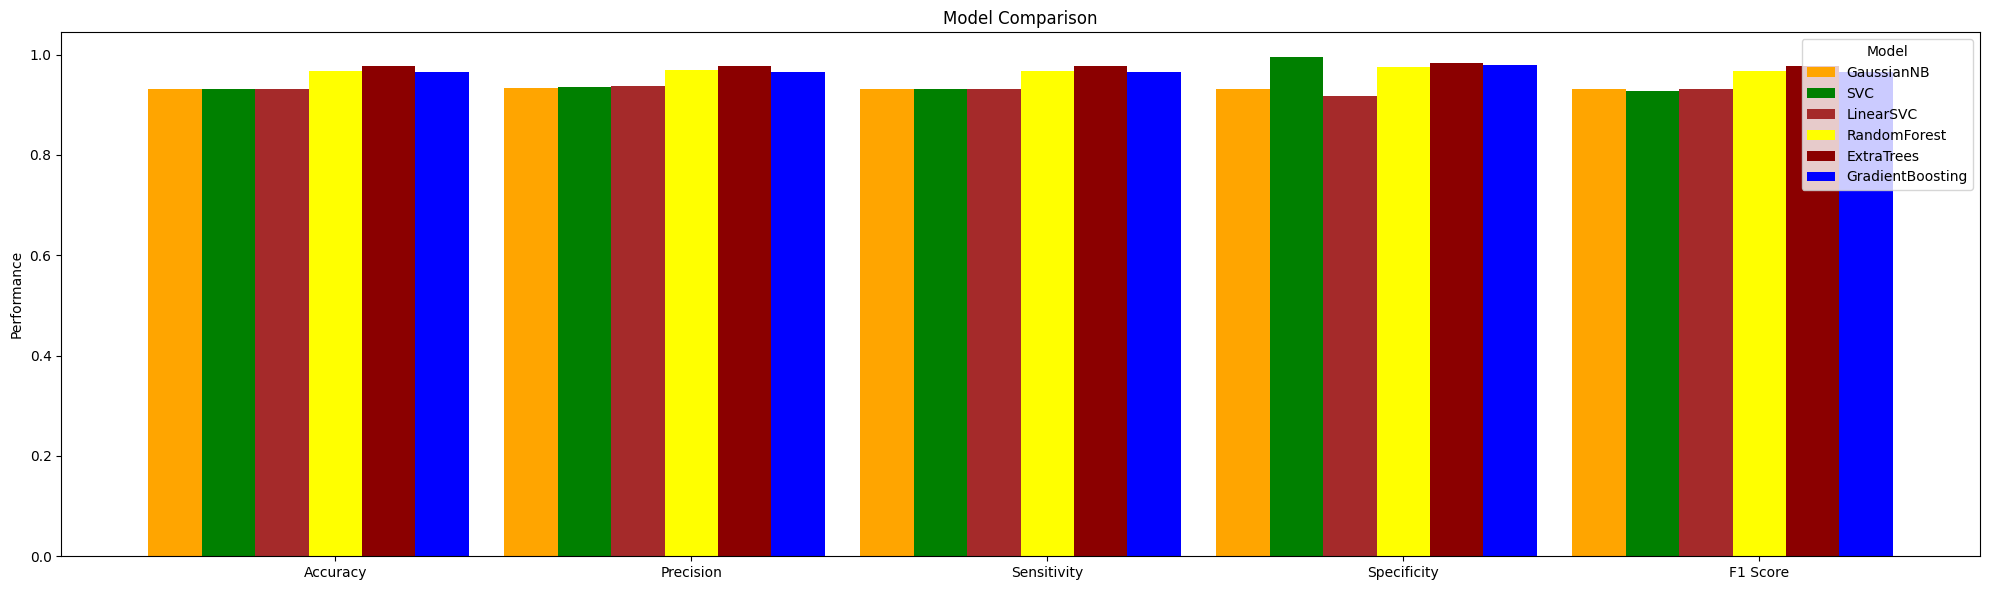

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
models_to_compare = [
    "GaussianNB", "SVC", "LinearSVC", "RandomForest", "ExtraTrees", "GradientBoosting",

]
compare_models(models_to_compare, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Performance Metrics:
Accuracy: 96.23%
Precision: 96.30%
Recall (Sensitivity): 96.23%
Specificity: 96.60%
F1 Score: 96.25%
Bagging Performance Metrics:
Accuracy: 94.98%
Precision: 94.95%
Recall (Sensitivity): 94.98%
Specificity: 97.01%
F1 Score: 94.96%
Voting Performance Metrics:
Accuracy: 92.56%
Precision: 93.15%
Recall (Sensitivity): 92.56%
Specificity: 99.73%
F1 Score: 92.22%
LogisticRegression Performance Metrics:
Accuracy: 96.91%
Precision: 97.01%
Recall (Sensitivity): 96.91%
Specificity: 96.73%
F1 Score: 96.93%
XGBClassifier Performance Metrics:
Accuracy: 97.39%
Precision: 97.43%
Recall (Sensitivity): 97.39%
Specificity: 97.55%
F1 Score: 97.40%
[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23488
[Li

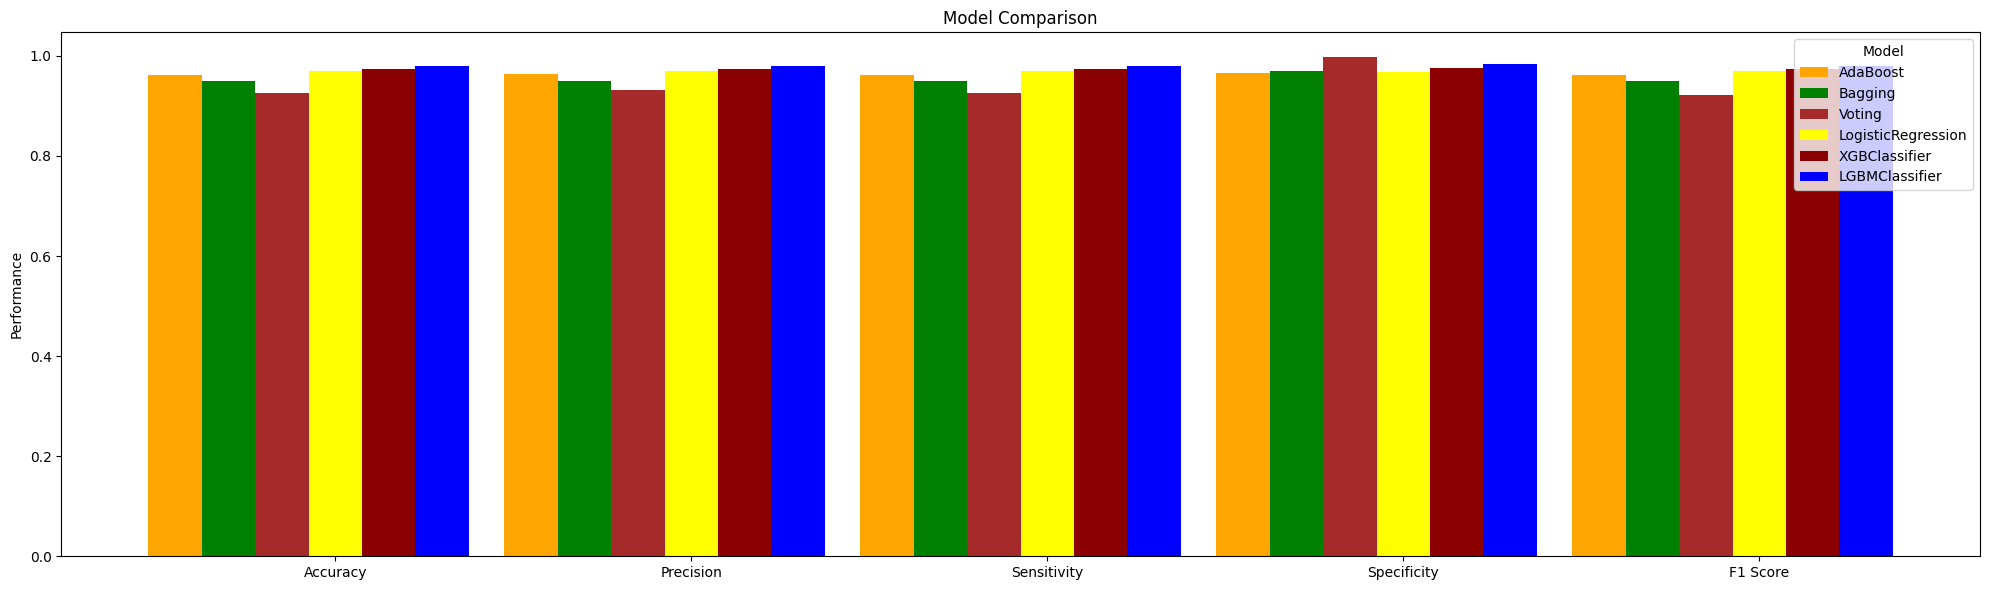

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
models_to_compare = [

    "AdaBoost", "Bagging", "Voting", "LogisticRegression", "XGBClassifier", "LGBMClassifier",

]
compare_models(models_to_compare, X_train, X_test, y_train, y_test)


CatBoostClassifier Performance Metrics:
Accuracy: 98.26%
Precision: 98.27%
Recall (Sensitivity): 98.26%
Specificity: 98.64%
F1 Score: 98.26%
Perceptron Performance Metrics:
Accuracy: 95.17%
Precision: 95.20%
Recall (Sensitivity): 95.17%
Specificity: 96.19%
F1 Score: 95.18%
SGDClassifier Performance Metrics:
Accuracy: 95.94%
Precision: 95.94%
Recall (Sensitivity): 95.94%
Specificity: 98.37%
F1 Score: 95.90%
PassiveAggressive Performance Metrics:
Accuracy: 94.78%
Precision: 95.28%
Recall (Sensitivity): 94.78%
Specificity: 93.61%
F1 Score: 94.87%


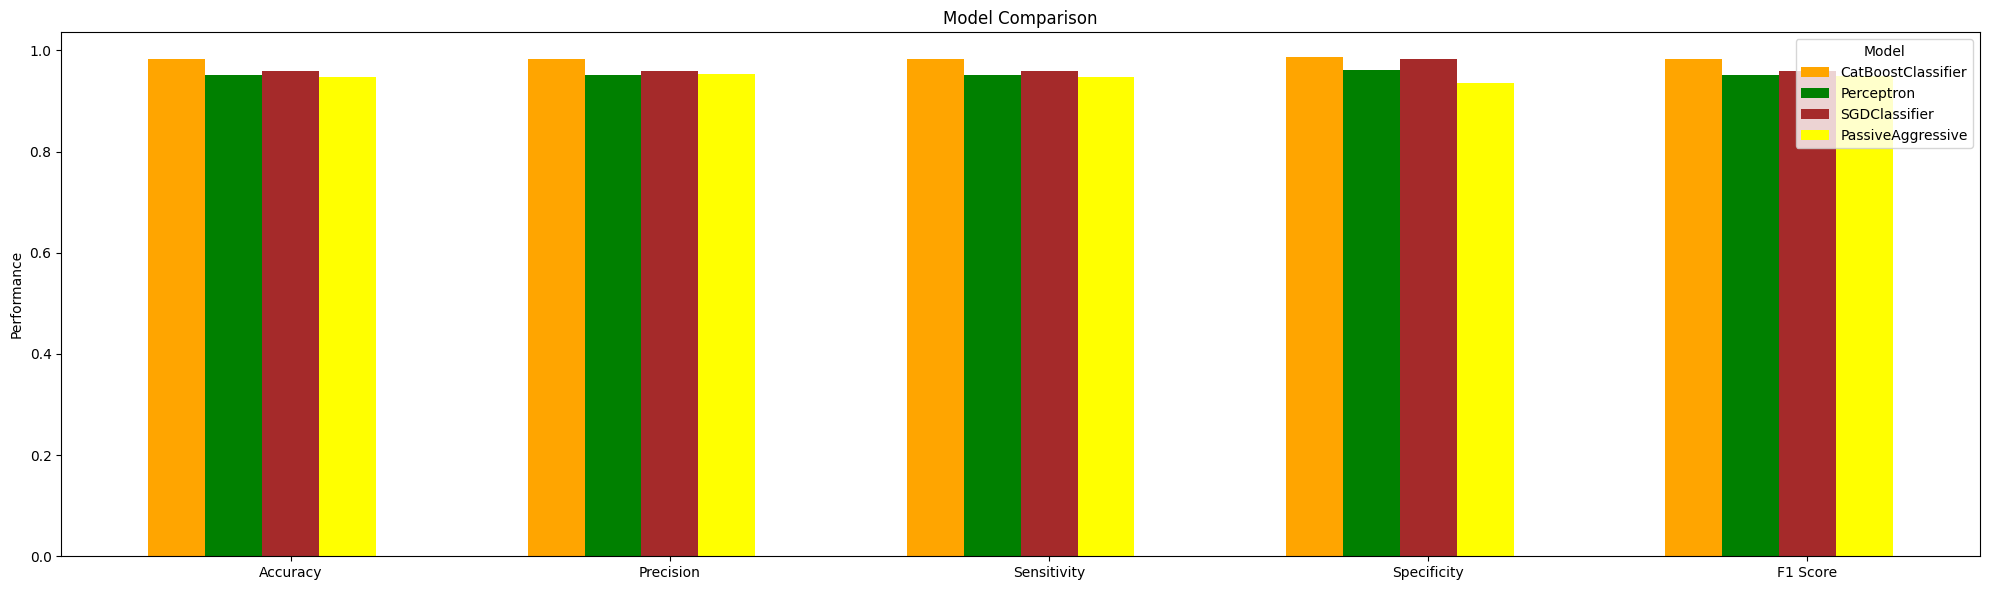

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
models_to_compare = [

    "CatBoostClassifier", "Perceptron", "SGDClassifier", "PassiveAggressive"
]
compare_models(models_to_compare, X_train, X_test, y_train, y_test)


In [21]:
import pandas as pd

# Define the list of model names
model_names = [
    "GaussianNB", "SVC", "LinearSVC", "RandomForest", "ExtraTrees",
    "GradientBoosting", "AdaBoost", "Bagging", "Voting",
    "LogisticRegression", "XGBClassifier", "LGBMClassifier",
    "CatBoostClassifier", "Perceptron", "SGDClassifier",
    "PassiveAggressive"
]

# Get the results for each model
results = [evaluate_model(model_name, X_train, X_test, y_train, y_test) for model_name in model_names]

# Convert results into a DataFrame
result_summary = pd.DataFrame(results)

# Display the result summary
print(result_summary)


GaussianNB Performance Metrics:
Accuracy: 93.04%
Precision: 93.41%
Recall (Sensitivity): 93.04%
Specificity: 93.06%
F1 Score: 93.14%
SVC Performance Metrics:
Accuracy: 93.04%
Precision: 93.46%
Recall (Sensitivity): 93.04%
Specificity: 99.46%
F1 Score: 92.77%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC Performance Metrics:
Accuracy: 93.04%
Precision: 93.76%
Recall (Sensitivity): 93.04%
Specificity: 91.84%
F1 Score: 93.18%
RandomForest Performance Metrics:
Accuracy: 96.43%
Precision: 96.43%
Recall (Sensitivity): 96.43%
Specificity: 97.41%
F1 Score: 96.43%
ExtraTrees Performance Metrics:
Accuracy: 97.97%
Precision: 98.00%
Recall (Sensitivity): 97.97%
Specificity: 98.10%
F1 Score: 97.98%
GradientBoosting Performance Metrics:
Accuracy: 96.62%
Precision: 96.61%
Recall (Sensitivity): 96.62%
Specificity: 97.96%
F1 Score: 96.61%


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Performance Metrics:
Accuracy: 96.23%
Precision: 96.30%
Recall (Sensitivity): 96.23%
Specificity: 96.60%
F1 Score: 96.25%
Bagging Performance Metrics:
Accuracy: 96.14%
Precision: 96.12%
Recall (Sensitivity): 96.14%
Specificity: 97.82%
F1 Score: 96.12%
Voting Performance Metrics:
Accuracy: 92.75%
Precision: 93.32%
Recall (Sensitivity): 92.75%
Specificity: 99.73%
F1 Score: 92.43%
LogisticRegression Performance Metrics:
Accuracy: 96.91%
Precision: 97.01%
Recall (Sensitivity): 96.91%
Specificity: 96.73%
F1 Score: 96.93%
XGBClassifier Performance Metrics:
Accuracy: 97.39%
Precision: 97.43%
Recall (Sensitivity): 97.39%
Specificity: 97.55%
F1 Score: 97.40%
[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23488
[Li

In [22]:
!pip install scikit-learn --upgrade

import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Perceptron, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

def evaluate_model(model_name, X_train, X_test, y_train, y_test):
    model_dict = {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
        "SVC": SVC(),
        "LinearSVC": LinearSVC(),
        "RandomForest": RandomForestClassifier(),
        "ExtraTrees": ExtraTreesClassifier(),
        "GradientBoosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        # Use 'estimator' instead of 'base_estimator' for older scikit-learn versions
        "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
        "Voting": VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svc', SVC())], voting='hard'),
        "LogisticRegression": LogisticRegression(),
        "LogisticRegressionCV": LogisticRegressionCV(),
        "DecisionTree": DecisionTreeClassifier(),
        "KNeighbors": KNeighborsClassifier(),
        "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
        "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
        "DummyClassifier": DummyClassifier(strategy="most_frequent"),
        "XGBClassifier": XGBClassifier(),
        "LGBMClassifier": LGBMClassifier(),
        "CatBoostClassifier": CatBoostClassifier(verbose=0),
        "Perceptron": Perceptron(),
        "RidgeClassifier": RidgeClassifier(),
        "SGDClassifier": SGDClassifier(),
        "PassiveAggressive": PassiveAggressiveClassifier()
    }
    if model_name not in model_dict:
        raise ValueError(f"Invalid model name '{model_name}'. Please select from the following: {list(model_dict.keys())}")
    model = model_dict[model_name]
    if model_name == "MultinomialNB":
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1) * 100

    print(f"{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu', cbar=False,
                                annot_kws={"size": 12}, linewidths=0.5, linecolor='black')

    plt.title(f'{model_name} Confusion Matrix', fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)

    # Customizing the ticks (if necessary, adapt to actual class labels)
    plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'], fontsize=10)
    plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'], fontsize=10)

    # Remove gridlines
    plt.grid(False)
    plt.tight_layout()
    plt.savefig('confution_matrix.png')
    plt.show()
    from google.colab import files
    files.download('confution_matrix.png')
    return {"Model Name": model_name, "Accuracy": accuracy, "Precision": precision}

In [23]:
def cross_validate_model(model, X_train, y_train, cv_folds=10):

    cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv_folds)
    cv_mean_accuracy = cross_val_scores.mean() * 100
    return cv_mean_accuracy, cross_val_scores

GaussianNB Performance Metrics:
Accuracy: 93.04%
Precision: 93.41%


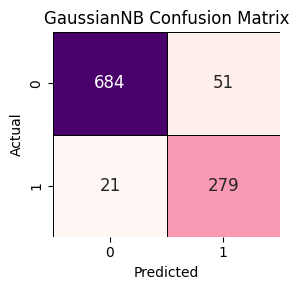

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GaussianNB Cross-Validation Accuracy (mean of 10 folds): 93.21%


In [24]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb_results = evaluate_model('GaussianNB', X_train, X_test, y_train, y_test)
model = GaussianNB()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"GaussianNB Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

SVC Performance Metrics:
Accuracy: 93.04%
Precision: 93.46%


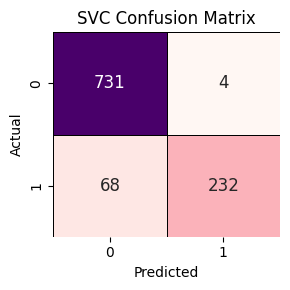

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVC Cross-Validation Accuracy (mean of 10 folds): 93.11%


In [25]:

SVC_result = evaluate_model('SVC', X_train, X_test, y_train, y_test)
model = SVC()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"SVC Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC Performance Metrics:
Accuracy: 93.04%
Precision: 93.76%


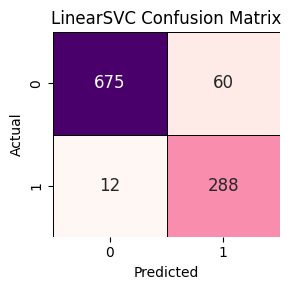

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC Cross-Validation Accuracy (mean of 10 folds): 92.41%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [26]:

LinearSVC_result = evaluate_model('LinearSVC', X_train, X_test, y_train, y_test)
model = LinearSVC()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"LinearSVC Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

RandomForest Performance Metrics:
Accuracy: 96.23%
Precision: 96.24%


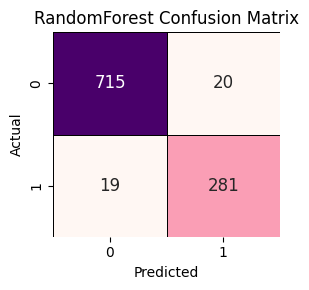

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RandomForest Cross-Validation Accuracy (mean of 10 folds): 97.34%


In [27]:
RandomForestClassifier_result = evaluate_model('RandomForest', X_train, X_test, y_train, y_test)
model = RandomForestClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"RandomForest Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

ExtraTrees Performance Metrics:
Accuracy: 97.68%
Precision: 97.68%


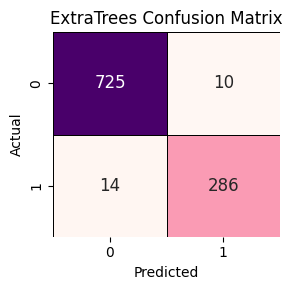

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ExtraTreesClassifier Cross-Validation Accuracy (mean of 10 folds): 97.82%


In [28]:
ExtraTreesClassifier_result = evaluate_model('ExtraTrees', X_train, X_test, y_train, y_test)
model = ExtraTreesClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"ExtraTreesClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

GradientBoosting Performance Metrics:
Accuracy: 96.62%
Precision: 96.61%


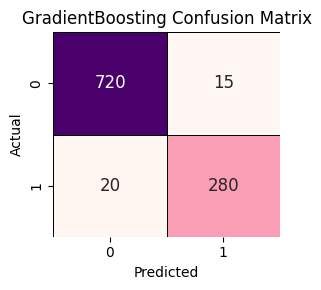

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GradientBoostingClassifier Cross-Validation Accuracy (mean of 10 folds): 96.18%


In [29]:
GradientBoostingClassifier_result = evaluate_model('GradientBoosting', X_train, X_test, y_train, y_test)
model = GradientBoostingClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"GradientBoostingClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Performance Metrics:
Accuracy: 96.23%
Precision: 96.30%


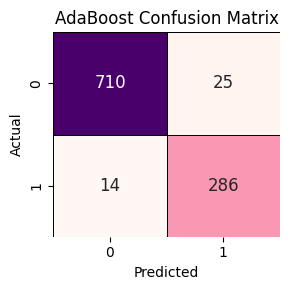

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoostClassifier Cross-Validation Accuracy (mean of 10 folds): 95.04%


In [30]:
AdaBoostClassifier_result = evaluate_model('AdaBoost', X_train, X_test, y_train, y_test)
model = AdaBoostClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"AdaBoostClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

Bagging Performance Metrics:
Accuracy: 96.43%
Precision: 96.43%


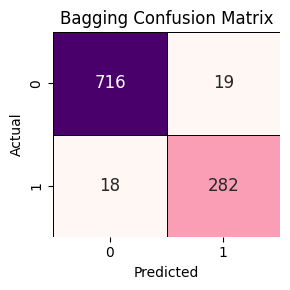

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BaggingClassifier Cross-Validation Accuracy (mean of 10 folds): 94.71%


In [31]:
BaggingClassifier_result = evaluate_model('Bagging', X_train, X_test, y_train, y_test)
model = BaggingClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"BaggingClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

LogisticRegression Performance Metrics:
Accuracy: 96.91%
Precision: 97.01%


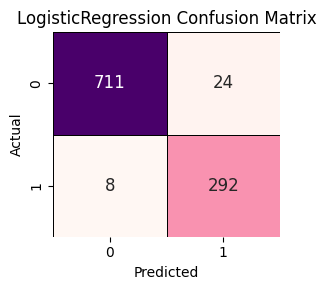

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LogisticRegressionCV Cross-Validation Accuracy (mean of 10 folds): 97.70%


In [33]:
LogisticRegression_result = evaluate_model('LogisticRegression',X_train, X_test, y_train, y_test)
model = LogisticRegressionCV()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"LogisticRegressionCV Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

XGBClassifier Performance Metrics:
Accuracy: 97.39%
Precision: 97.43%


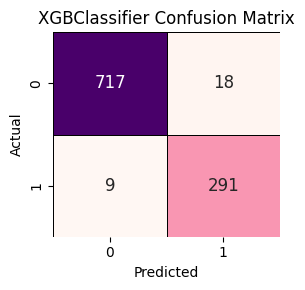

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBClassifier Cross-Validation Accuracy (mean of 10 folds): 97.29%


In [34]:
XGBClassifier_result = evaluate_model('XGBClassifier',X_train, X_test, y_train, y_test)
model = XGBClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"XGBClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23488
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2574
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067
LGBMClassifier Performance Metrics:
Accuracy: 97.97%
Precision: 97.98%


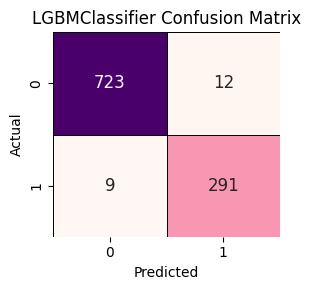

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[LightGBM] [Info] Number of positive: 1080, number of negative: 2643
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22536
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 2471
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290089 -> initscore=-0.894954
[LightGBM] [Info] Start training from score -0.894954
[LightGBM] [Info] Number of positive: 1080, number of negative: 2643
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22491
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 2463
[LightGBM] [Info] 

In [35]:
LGBMClassifier_result = evaluate_model('LGBMClassifier',X_train, X_test, y_train, y_test)
model = LGBMClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"LGBMClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

Perceptron Performance Metrics:
Accuracy: 95.17%
Precision: 95.20%


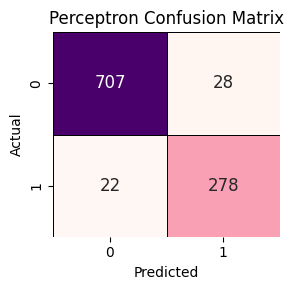

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Perceptron Cross-Validation Accuracy (mean of 10 folds): 95.82%


In [37]:
Perceptron_result = evaluate_model('Perceptron',X_train, X_test, y_train, y_test)
model = Perceptron()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"Perceptron Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

SGDClassifier Performance Metrics:
Accuracy: 96.33%
Precision: 96.32%


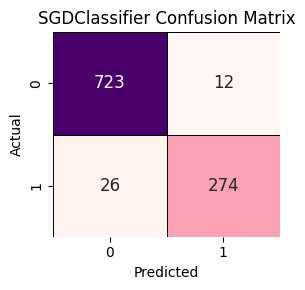

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SGDClassifier Cross-Validation Accuracy (mean of 10 folds): 95.14%


In [38]:
SGDClassifier_result = evaluate_model('SGDClassifier',X_train, X_test, y_train, y_test)
model = SGDClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"SGDClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

PassiveAggressive Performance Metrics:
Accuracy: 94.88%
Precision: 95.32%


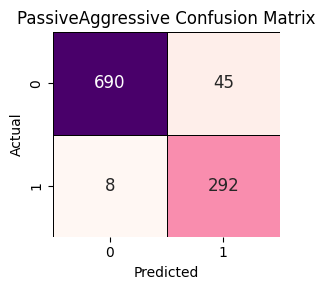

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PassiveAggressiveClassifier Cross-Validation Accuracy (mean of 10 folds): 93.96%


In [39]:
PassiveAggressiveClassifier_result = evaluate_model('PassiveAggressive',X_train, X_test, y_train, y_test)
model = PassiveAggressiveClassifier()
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"PassiveAggressiveClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

CatBoostClassifier Performance Metrics:
Accuracy: 98.26%
Precision: 98.27%


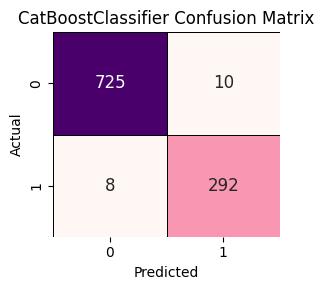

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
CatBoostClassifier_result = evaluate_model('CatBoostClassifier',X_train, X_test, y_train, y_test)

In [55]:
model = CatBoostClassifier(verbose=0)
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"CatBoostClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

CatBoostClassifier Cross-Validation Accuracy (mean of 10 folds): 97.68%


Voting Performance Metrics:
Accuracy: 92.75%
Precision: 93.26%


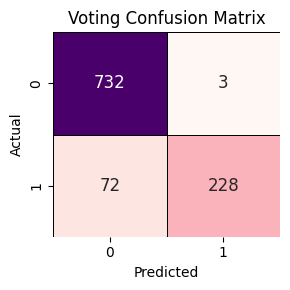

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

VotingClassifier Cross-Validation Accuracy (mean of 10 folds): 97.51%


In [56]:
VotingClassifier_result = evaluate_model('Voting',X_train, X_test, y_train, y_test)
model = VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svc', SVC(probability=True))], voting='soft')
cv_mean_accuracy, cv_scores = cross_validate_model(model, X_train, y_train, cv_folds=10)
print(f"VotingClassifier Cross-Validation Accuracy (mean of 10 folds): {cv_mean_accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:55:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1200, number of negative: 2937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23488
[LightGBM] [Info] Number of data points in the train set: 4137, number of used features: 2574
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.290065 -> initscore=-0.895067
[LightGBM] [Info] Start training from score -0.895067


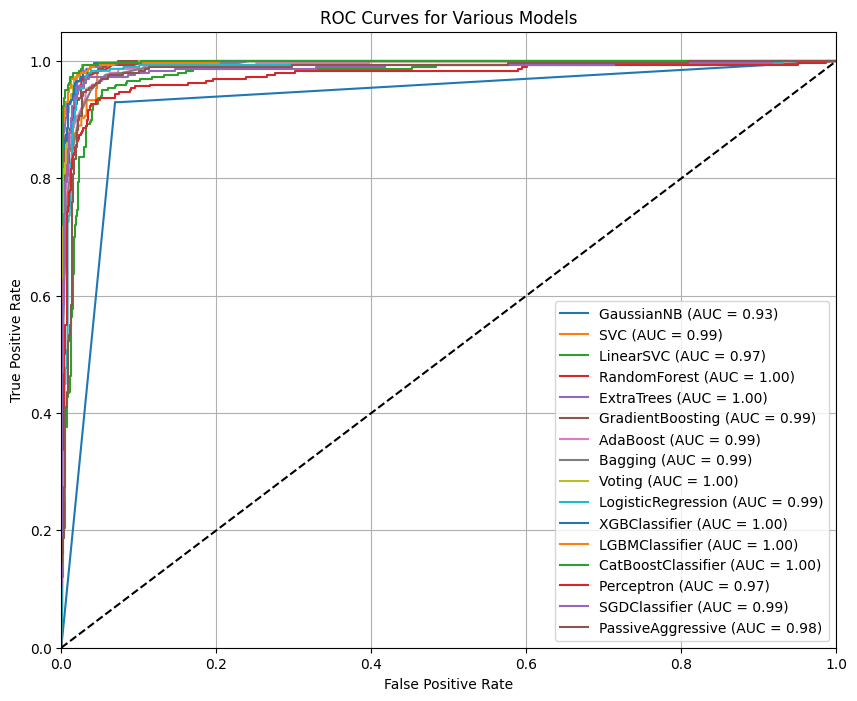

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  # Import roc_curve and auc from sklearn.metrics
from sklearn.preprocessing import label_binarize, MinMaxScaler # Import label_binarize
from sklearn.multiclass import OneVsRestClassifier # Import OneVsRestClassifier from sklearn.multiclass
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV


def plot_roc_curves(models, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 8))

    for model_name in models:
        # Get the model from the dictionary and fit it
        model_dict = {
            "GaussianNB": GaussianNB(),
            "SVC": SVC(probability=True),  # Ensure SVC outputs probabilities
            "LinearSVC": LinearSVC(),
            "RandomForest": RandomForestClassifier(),
            "ExtraTrees": ExtraTreesClassifier(),
            "GradientBoosting": GradientBoostingClassifier(),
            "AdaBoost": AdaBoostClassifier(),
            # Change 'base_estimator' to 'estimator' for BaggingClassifier
            "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
            "Voting": VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svc', SVC(probability=True))], voting='soft'),
            "LogisticRegression": LogisticRegression(),
            "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            "LGBMClassifier": LGBMClassifier(),
            "CatBoostClassifier": CatBoostClassifier(verbose=0),
            "Perceptron": Perceptron(),
            "SGDClassifier": SGDClassifier(),
            "PassiveAggressive": PassiveAggressiveClassifier(),
        }

        if model_name not in model_dict:
            raise ValueError(f"Invalid model name '{model_name}'. Please select from the following: {list(model_dict.keys())}")

        model = model_dict[model_name]

        # For binary classification or One-vs-Rest multi-class strategy
        if model_name == "MultinomialNB":
            scaler = MinMaxScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

        # Fit the model and predict probabilities
        model.fit(X_train, y_train)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        else:
            y_prob = model.decision_function(X_test)

        # Check if y_prob is 1-dimensional and convert to 2-dimensional if necessary
        if y_prob.ndim == 1:
            y_prob = y_prob[:, np.newaxis]
            # Add a second column for binary classification if necessary
            if len(np.unique(y_test)) == 2:
                y_prob = np.hstack((1 - y_prob, y_prob))


        # For binary classification
        if len(np.unique(y_test)) == 2:
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
            roc_auc = auc(fpr, tpr)

        # For multi-class classification, use One-vs-Rest strategy
        else:
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
            if len(np.unique(y_test)) == 2:
                y_test_bin = y_test_bin.ravel()
            classifier = OneVsRestClassifier(model)
            y_prob = classifier.fit(X_train, y_train).predict_proba(X_test)
            fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
            roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot formatting
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Various Models')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Example usage to plot ROC curves for all models
models_to_compare = [
    "GaussianNB", "SVC", "LinearSVC", "RandomForest", "ExtraTrees", "GradientBoosting",
    "AdaBoost", "Bagging", "Voting", "LogisticRegression", "XGBClassifier", "LGBMClassifier",
    "CatBoostClassifier", "Perceptron", "SGDClassifier", "PassiveAggressive"
]

# Call the function to plot ROC curves
plot_roc_curves(models_to_compare, X_train, X_test, y_train, y_test)
